In [1]:
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

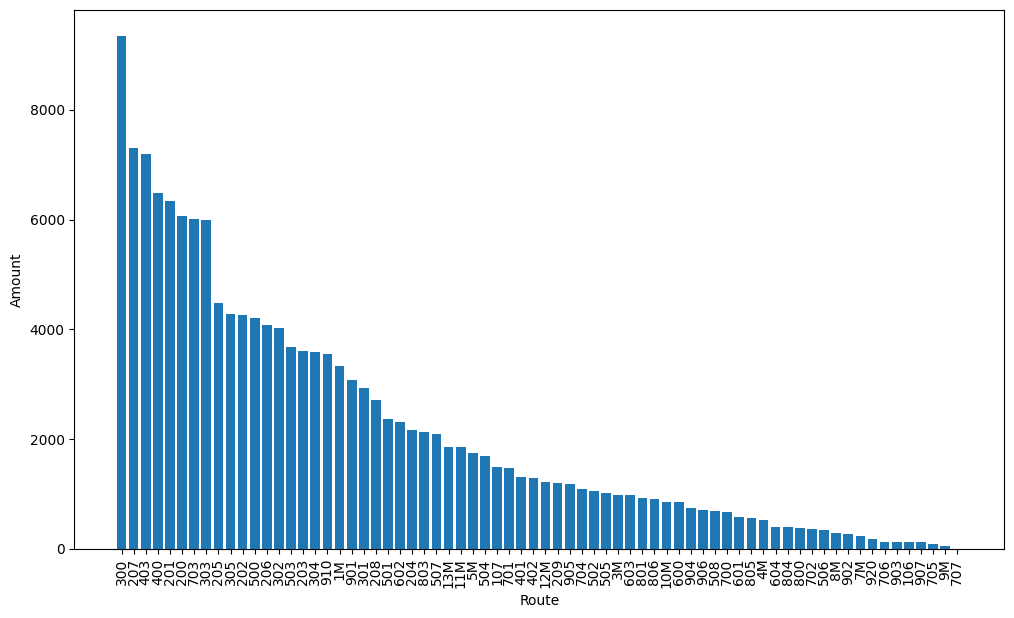

In [28]:
conn = psycopg2.connect("dbname=leo user=leo")
cursor_psql = conn.cursor()

# number of trips per trip_id per route_id per hour
sql = '''
select
    route_id,
    trip_id,
    DATE_TRUNC('hour', init_stop_time),
    count(*)
from
    warehouse 
group by rollup (trip_id, route_id, init_stop_time)
order by count(*) desc
'''

cursor_psql.execute(sql)
results = cursor_psql.fetchall()
results_np = np.array(results)

routes_temp = results_np[:, 0]
n_trips_temp = results_np[:, -1]
routes = []
n_trips = []

for route, n in zip(routes_temp, n_trips_temp):
    if route != None and n != None:
        routes.append(route)
        n_trips.append(n)

fig = plt.figure(figsize=(12, 7))
plt.xlabel("Route")
plt.xticks(rotation=90)
plt.ylabel("Amount")
plt.bar(routes, n_trips)
plt.savefig("fig_trips_amount.png")